In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

In [4]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [6]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': pd.Series.nunique,
    'Category': pd.Series.nunique
}).rename(columns={
    'TotalValue': 'TotalSpent',
    'Quantity': 'TotalQuantity',
    'ProductID': 'UniqueProducts',
    'Category': 'UniqueCategories'
}).reset_index()

In [7]:
# Normalize features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

# Compute similarity matrix
similarity_matrix = cosine_similarity(customer_features_scaled)

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


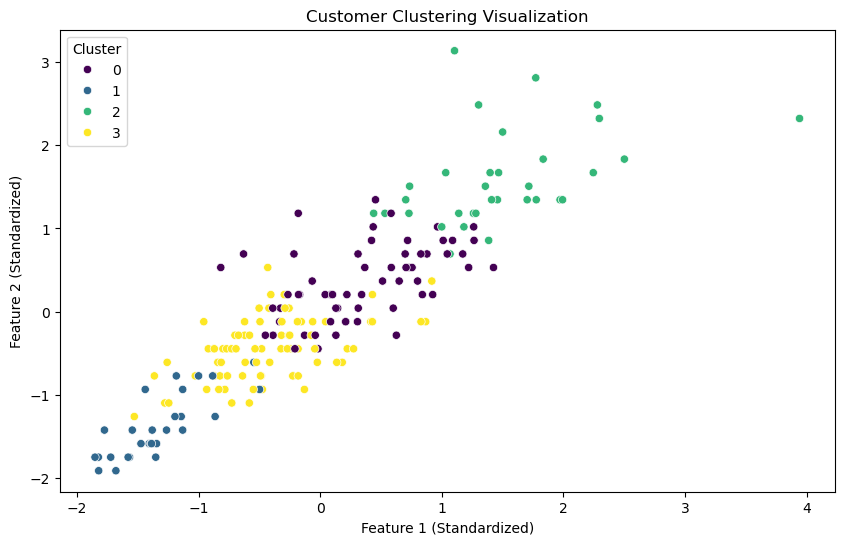

In [11]:
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features_scaled[:, 0], 
    y=customer_features_scaled[:, 1], 
    hue=customer_features['Cluster'], 
    palette='viridis'
)
plt.title('Customer Clustering Visualization')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster')
plt.show()

In [12]:
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.0163274937539302
